# библиотеки

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense

# Параметры

In [4]:
max_features = 10000
maxlen = 100

# 1 Загрузить  набор данных из 25 000 обзоров фильмов из IMDB, помеченных
настроениями (положительные/отрицательные). Он доступен в Keras (см. сл. 48 лекции 16).

In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Предобработка: приведение последовательностей к одинаковой длине
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 2 Создать 3 разные рекуррентные сети для определения рейтинга
фильма (простую, со слоями LSTM, GRU, ...)

## Модель 1: Простая RNN

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC


model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=max_features, output_dim=128, input_shape=(maxlen,)))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(1, activation='sigmoid'))


In [100]:
import tensorflow as tf

model_rnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc', curve='PR'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalseNegatives(name='fn')
    ]
)


In [102]:
print("Обучение простой RNN...")
history_rnn = model_rnn.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Обучение простой RNN...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6101 - auc: 0.6513 - fn: 1920.7013 - loss: 0.6408 - precision: 0.6111 - recall: 0.5637 - tp: 3094.5798 - val_accuracy: 0.7386 - val_auc: 0.8066 - val_fn: 590.0000 - val_loss: 0.5262 - val_precision: 0.7238 - val_recall: 0.7610 - val_tp: 1879.0000
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8315 - auc: 0.9081 - fn: 731.2156 - loss: 0.3855 - precision: 0.8175 - recall: 0.8490 - tp: 4268.3643 - val_accuracy: 0.8148 - val_auc: 0.8621 - val_fn: 500.0000 - val_loss: 0.4717 - val_precision: 0.8221 - val_recall: 0.7975 - val_tp: 1969.0000
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9322 - auc: 0.9785 - fn: 346.2939 - loss: 0.1841 - precision: 0.9335 - recall: 0.9314 - tp: 4682.9648 - val_accuracy: 0.7922 - val_auc: 0.8421 - val_fn: 554.0000 - val_loss: 0.5341 - val_precision: 0.7979 - val_recall: 0.7756 - val_tp: 1915.0000
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━

In [106]:
print("Оценка модели на тестовых данных:")

test_results = model_rnn.evaluate(x_test, y_test)
print(f"\nTest Results:")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"AUC-PR: {test_results[2]:.4f}")
print(f"Precision: {test_results[3]:.4f}")
print(f"Recall: {test_results[4]:.4f}")
print(f"True Positives: {test_results[5]}")
print(f"False Negatives: {test_results[6]}")


Оценка модели на тестовых данных:
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7345 - auc: 0.7535 - fn: 1586.1124 - loss: 1.2919 - precision: 0.7251 - recall: 0.7427 - tp: 4640.7456

Test Results:
Accuracy: 0.7359
AUC-PR: 0.7623
Precision: 0.7305
Recall: 0.7475
True Positives: 9344.0
False Negatives: 3156.0


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


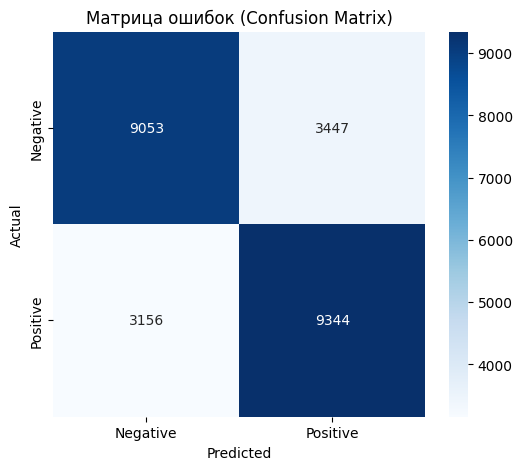

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_proba = model_rnn.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

## Модель 2: RNN с LSTM

In [112]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))



C:\Users\Alexandr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [114]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc', curve='PR'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalseNegatives(name='fn')
    ])

In [116]:
print("Обучение RNN с LSTM...")
history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Обучение RNN с LSTM...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7074 - auc: 0.7856 - fn: 1142.6997 - loss: 0.5361 - precision: 0.7000 - recall: 0.7691 - tp: 3893.9568 - val_accuracy: 0.8468 - val_auc: 0.9202 - val_fn: 327.0000 - val_loss: 0.3674 - val_precision: 0.8299 - val_recall: 0.8676 - val_tp: 2142.0000
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8957 - auc: 0.9567 - fn: 524.7396 - loss: 0.2669 - precision: 0.8976 - recall: 0.8947 - tp: 4512.0669 - val_accuracy: 0.8382 - val_auc: 0.9209 - val_fn: 301.0000 - val_loss: 0.3642 - val_precision: 0.8102 - val_recall: 0.8781 - val_tp: 2168.0000
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9357 - auc: 0.9805 - fn: 328.8466 - loss: 0.1766 - precision: 0.9353 - recall: 0.9374 - tp: 4706.3516 - val_accuracy: 0.8320 - val_auc: 0.9040 - val_fn: 455.0000 - val_loss: 0.4231 - val_precision: 0.8395 - val_recall: 0.8157 - val_tp: 2014.0000
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━

In [118]:
print(f'RNN с LSTM ')

print("Оценка модели на тестовых данных:")

test_results = model_lstm.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Results:")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"AUC-PR: {test_results[2]:.4f}")
print(f"Precision: {test_results[3]:.4f}")
print(f"Recall: {test_results[4]:.4f}")
print(f"True Positives: {test_results[5]}")
print(f"False Negatives: {test_results[6]}")


RNN с LSTM 
Оценка модели на тестовых данных:

Test Results:
Accuracy: 0.8195
AUC-PR: 0.8668
Precision: 0.8261
Recall: 0.8094
True Positives: 10117.0
False Negatives: 2383.0


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


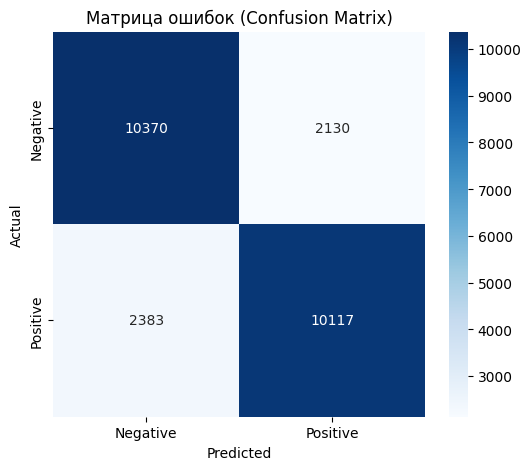

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_proba = model_lstm.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()

## Модель 3: RNN с GRU

In [123]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model_gru.add(GRU(64))
model_gru.add(Dense(1, activation='sigmoid'))


C:\Users\Alexandr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [125]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc', curve='PR'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalseNegatives(name='fn')
    ])

In [127]:
print("Обучение RNN с GRU...")
history_gru = model_gru.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Обучение RNN с GRU...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7023 - auc: 0.7734 - fn: 1520.6390 - loss: 0.5347 - precision: 0.7198 - recall: 0.6065 - tp: 3493.0400 - val_accuracy: 0.8414 - val_auc: 0.9192 - val_fn: 521.0000 - val_loss: 0.3663 - val_precision: 0.8775 - val_recall: 0.7890 - val_tp: 1948.0000
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8955 - auc: 0.9568 - fn: 507.1342 - loss: 0.2592 - precision: 0.8918 - recall: 0.8999 - tp: 4524.7778 - val_accuracy: 0.8374 - val_auc: 0.9345 - val_fn: 628.0000 - val_loss: 0.3870 - val_precision: 0.9087 - val_recall: 0.7456 - val_tp: 1841.0000
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9390 - auc: 0.9815 - fn: 288.6629 - loss: 0.1672 - precision: 0.9359 - recall: 0.9440 - tp: 4769.6421 - val_accuracy: 0.8404 - val_auc: 0.9233 - val_fn: 468.0000 - val_loss: 0.3682 - val_precision: 0.8584 - val_recall: 0.8104 - val_tp: 2001.0000
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━

In [129]:
print(f'RNN с GRU')

print("Оценка модели на тестовых данных:")

test_results = model_gru.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Results:")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"AUC-PR: {test_results[2]:.4f}")
print(f"Precision: {test_results[3]:.4f}")
print(f"Recall: {test_results[4]:.4f}")
print(f"True Positives: {test_results[5]}")
print(f"False Negatives: {test_results[6]}")


RNN с GRU
Оценка модели на тестовых данных:

Test Results:
Accuracy: 0.8212
AUC-PR: 0.8545
Precision: 0.8311
Recall: 0.8062
True Positives: 10078.0
False Negatives: 2422.0


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


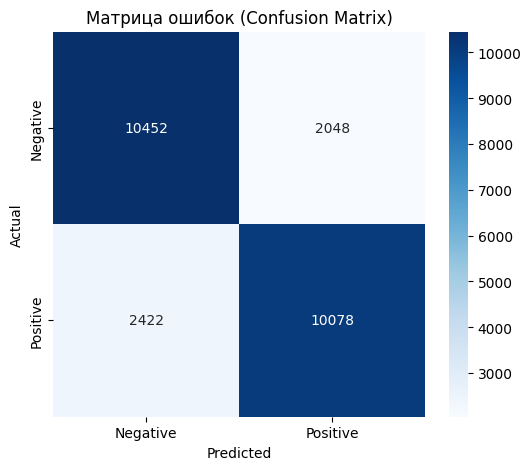

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_proba = model_gru.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()